In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('churn_analysis.csv')
df.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [58]:
df_treat = df[df.treatment == 1]

In [4]:
states = list(df.state.value_counts().index)

In [5]:
import itertools

In [6]:
pair_states = list(itertools.combinations(states, 2))

In [59]:
p_list = []
for pair in pair_states:
    df_new = df_treat[(df_treat.state == pair[0]) | (df_treat.state == pair[1])]
    cont_table = pd.crosstab(df_new.state, df_new.churn)
    t_f = (sum(sum(cont_table)) > 40) and (sum(sum(cont_table<5))/(cont_table.shape[0]*cont_table.shape[1])<0.2)
    p_list.append([pair, t_f, stats.chi2_contingency(cont_table, correction=False)[1]])

In [60]:
p_list = pd.DataFrame(p_list, columns = ['states', 'condition', 'p'])

In [61]:
len(p_list[p_list.p < 0.05])

34

In [62]:
True and False

False

In [63]:
p_list.condition.value_counts()

False    1159
True      116
Name: condition, dtype: int64

In [64]:
cont_table = pd.crosstab(df_treat.state, df_treat.churn)

In [65]:
t_f = (sum(sum(cont_table)) > 40) and (sum(sum(cont_table<5))/(cont_table.shape[0]*cont_table.shape[1])<0.2)

In [66]:
stats.chi2_contingency(cont_table, correction=False)[1]

0.7097590042778473

In [22]:
cont_table.shape

(51, 2)

In [67]:
p_list_Yates = []
for pair in pair_states:
    df_new = df_treat[(df_treat.state == pair[0]) | (df_treat.state == pair[1])]
    cont_table = pd.crosstab(df_new.state, df_new.churn)
    t_f = (sum(sum(cont_table)) > 40) and (sum(sum(cont_table<5))/(cont_table.shape[0]*cont_table.shape[1])<0.2)
    p_list_Yates.append([pair, t_f, stats.chi2_contingency(cont_table, correction=True)[1]])

In [68]:
p_list_Yates = pd.DataFrame(p_list_Yates, columns = ['states', 'condition', 'p'])

In [69]:
len(p_list_Yates[p_list_Yates.p < 0.05])

0

In [70]:
(p_list_Yates.p>=p_list.p).value_counts()

True     1083
False     192
Name: p, dtype: int64

In [71]:
np.mean(p_list_Yates.p)>np.mean(p_list.p)

True

In [72]:
p_list_Fisher = []
for pair in pair_states:
    df_new = df_treat[(df_treat.state == pair[0]) | (df_treat.state == pair[1])]
    cont_table = pd.crosstab(df_new.state, df_new.churn)
    p_list_Fisher.append([pair, stats.fisher_exact(cont_table)[1]])

In [73]:
p_list_Fisher = pd.DataFrame(p_list_Fisher, columns = ['states', 'p'])

In [75]:
np.mean(p_list_Fisher.p), np.mean(p_list_Yates.p)

(0.6483383060020684, 0.6640566382051032)

In [45]:
stats.pearsonr(df.day_calls, df.mes_estim)

(-0.051794350587572625, 0.0027798836869756707)

((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.13861708020693372, 0.4842364236423642, 0.9996050483985329))

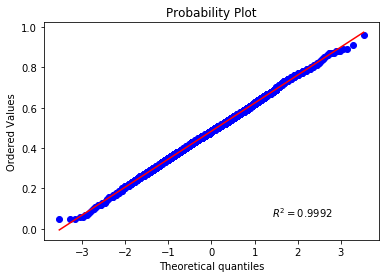

In [49]:
stats.probplot(df.mes_estim, plot=plt, rvalue=True)

In [50]:
stats.spearmanr(df.day_calls, df.mes_estim)

SpearmanrResult(correlation=0.043349880533927444, pvalue=0.012317367189170541)

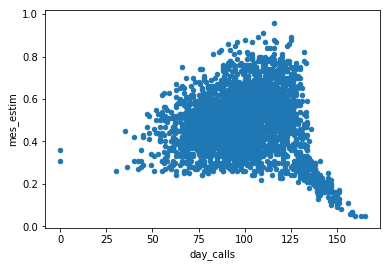

In [51]:
df.plot.scatter(x = 'day_calls', y = 'mes_estim')

In [53]:
df_state_churn = pd.crosstab(df[df.treatment == 1].state, df[df.treatment == 1].churn)

In [76]:
t_f = (sum(sum(df_state_churn)) > 40) and (sum(sum(df_state_churn<5))/(df_state_churn.shape[0]*df_state_churn.shape[1])<0.2)

In [77]:
t_f

False

In [56]:
chi2_for_vcramer, pval, _, __ = stats.chi2_contingency(df_state_churn)

In [57]:
K1 = df_state_churn.shape[0]
K2 = df_state_churn.shape[1]
n = sum(sum(df_state_churn))
v_cramer = np.sqrt(chi2_for_vcramer/(n*(min(K1, K2) - 1)))
print ('Cramer\'s V = %.4f' % v_cramer)
print ('p-value = ', pval)

Cramer's V = 0.2004
p-value =  0.7097590042778473


In [90]:
df_tr0_churn = pd.crosstab(df[df.treatment != 2].churn, df[df.treatment != 2].treatment)
df_tr0_churn

treatment,0,1
churn,,
False.,968,917
True.,165,180


In [79]:
import statsmodels.stats.multitest as smm

In [91]:
df_tr2_churn = pd.crosstab(df[df.treatment != 0].churn, df[df.treatment != 0].treatment)
df_tr2_churn

treatment,1,2
churn,,
False.,917,965
True.,180,138


In [101]:
a, b = df_tr2_churn.iloc[1, :]
a, b

(180, 138)

In [114]:
pvals = []
dfs = [df_tr0_churn, df_tr2_churn, df_treat_no1_churn]
for my_df in dfs:
    n1, n2 = np.sum(my_df)
    a, b = df_tr2_churn.iloc[1, :]
    p1 = a / n1
    p2 = b / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    z = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
    pvals.append(proportions_diff_z_test(z))
bon_holm = smm.multipletests(pvals, alpha=0.05/3, method='holm')
pvals

[0.025551265805782597, 0.009348084294451109, 0.022319778925271816]

In [115]:
bon_holm

(array([False, False, False]),
 array([0.04463956, 0.02804425, 0.04463956]),
 0.005586708747341684,
 0.005555555555555556)

In [92]:
df_treat_no1_churn = pd.crosstab(df[df.treatment != 1].churn, df[df.treatment != 1].treatment)
df_treat_no1_churn

treatment,0,2
churn,,
False.,968,965
True.,165,138


In [85]:
stats.chi2_contingency(df_treat_churn)

(6.747904391985955,
 0.03425399098362844,
 2,
 array([[968.81188119, 164.18811881],
        [938.02880288, 158.97119712],
        [943.15931593, 159.84068407]]))

In [ ]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [103]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [119]:
pvals = []
dfs = [df_tr0_churn, df_tr2_churn, df_treat_no1_churn]
for my_df in dfs:
    pvals.append(stats.fisher_exact(my_df)[1])
bon_holm = smm.multipletests(pvals, alpha=0.05/3)
pvals

[0.24158733935746782, 0.01080036389947233, 0.173935660449138]

In [120]:
bon_holm

(array([False, False, False]),
 array([0.31761771, 0.03205241, 0.31761771]),
 0.005586708747341684,
 0.005555555555555556)